# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import matplotlib as plt
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()
data.loc[data['days_employed'].isna()].head(40)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
def get_relations_debt_from(name_column): 
    result = round(data.groupby(name_column)['debt'].mean() * 100, 2)
    result = result.to_frame('debt_pct')
    result['debtor_count'] = data.groupby(name_column)['debt'].sum()
    result[name_column + '_count'] = data.groupby(name_column)['debt'].count()
    result[name_column + '_pct'] = round(data.groupby(name_column)['debt'].count() / \
                                        data.groupby(name_column)['debt'].count().sum() * 100, 2)
    return result
    
children_count = get_relations_debt_from('children')
children_count

,debt_pct,debtor_count,children_count,children_pct
children,,,,
0,7.54,1063,14091,66.06
1,9.23,444,4808,22.54
2,9.45,194,2052,9.62
3,8.18,27,330,1.55
4,9.76,4,41,0.19
5,0.00,0,9,0.04


**Таблица зависимости количества не возвращенных вовремя кредитов от количества детей в относительном и абсолютном выражении.**

          debt_pct - количество не возвращенных кредитов в %
      debtor_count - количество не возвращенных кредитов
    children_count - количество заемщиков с соответствующим количеством детей
      children_pct - количество заемщиков с соответствующим количеством детей в %

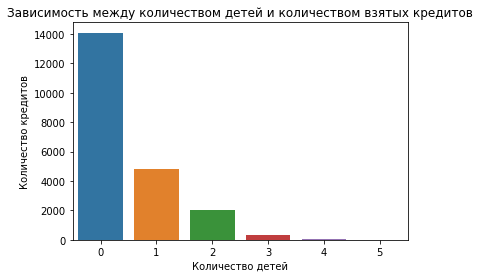

In [23]:
bar = sns.barplot(data=children_count, x=children_count.index, y='children_count')
bar.set(xlabel='Количество детей', ylabel='Количество кредитов',\
        title='Зависимость между количеством детей и количеством взятых кредитов')
pass

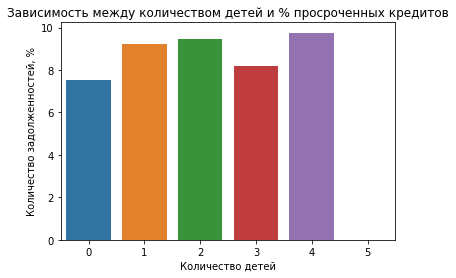

In [24]:
bar = sns.barplot(data=children_count, x=children_count.index, y='debt_pct')
bar.set(xlabel='Количество детей', ylabel='Количество задолженностей, %',\
        title='Зависимость между количеством детей и % просроченных кредитов')
pass

**Вывод:** 
Из таблицы и диаграмм видно что чаще всего (66%) берут кредиты заемщики без детей. И почти нет данных (или не берут кредиты) заемщики у которых 3 и более детей (и таких семей вообще меньше). 

Хотя исходя из данных видно, что заемщики с 5 детьми ВСЕГДА отдают кредит в срок, но говорить о том что такие заемщики всегда вернут кредит в срок не правильно, потому что из 21331 заемщика, таких было всего 9 (0,04 %).
Заемщиков с 3 и более детьми 1,78 % от общего количества. В анализе зависимости между количеством детей и возвратом кредита в срок их можно было бы объединить с категорией "2 ребенка". Но на полученные результаты это не повлияет.

    1. Количество детей влияет на возврат кредита в срок.
    2. Бездетные заемщики на четверть лучше отдают кредиты, чем заемщики с детьми.
    3. Мало данных о заемщиках с 3 и более детьми, это не позволяет сделать достоверный анализ по этим категориям.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
family_status_group = get_relations_debt_from('family_status')
family_status_group

,debt_pct,debtor_count,family_status_count,family_status_pct
family_status,,,,
Не женат / не замужем,9.76,273,2796,13.11
в разводе,7.06,84,1189,5.57
вдовец / вдова,6.62,63,951,4.46
гражданский брак,9.31,385,4134,19.38
женат / замужем,7.56,927,12261,57.48


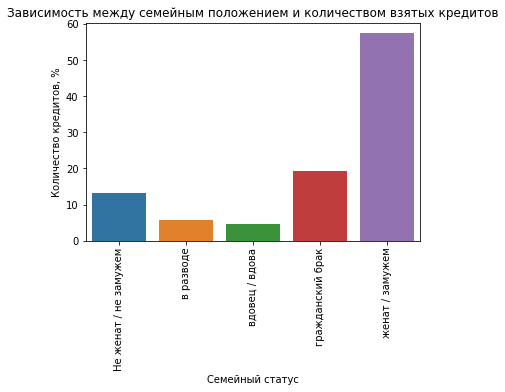

In [26]:
bar = sns.barplot(data=family_status_group, x=family_status_group.index, y='family_status_pct')
bar.set(xlabel='Семейный статус', ylabel='Количество кредитов, %',\
        title='Зависимость между семейным положением и количеством взятых кредитов')
bar.set_xticklabels(family_status_group.index, rotation=90)
pass

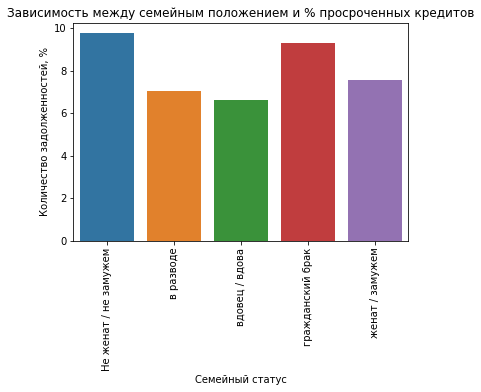

In [27]:
bar = sns.barplot(data=family_status_group, x=family_status_group.index, y='debt_pct')
bar.set(xlabel='Семейный статус', ylabel='Количество задолженностей, %',\
        title='Зависимость между семейным положением и % просроченных кредитов')
bar.set_xticklabels(family_status_group.index, rotation=90)
pass

In [28]:
family_status_group_1 = data.groupby('family_status')
family_status_group_1 = family_status_group_1['debt'].agg(['mean', 'sum', 'count'])
family_status_group_1['mean'] = round(family_status_group_1['mean'] * 100, 2)
family_status_group_1['count_pct'] = round(family_status_group_1['count'] / family_status_group_1['count'].sum() * 100, 2)
family_status_group_1

,mean,sum,count,count_pct
family_status,,,,
Не женат / не замужем,9.76,273,2796,13.11
в разводе,7.06,84,1189,5.57
вдовец / вдова,6.62,63,951,4.46
гражданский брак,9.31,385,4134,19.38
женат / замужем,7.56,927,12261,57.48


Чаще всего берут кредиты заемщики с семейным положением женат/замужем (57,5 %). Лучше всего возвращают кредиты заемщики с семейным положением "в разводе" и "вдовец/вдова", но таких заемщиков не много (4-6 %). Больше всего кредитов не возвращенных в срок у заемщиков категории "не женат/не замужем".

**Вывод:** Процент кредитов не возвращенных вовремя колеблется ~ от 6,5 до 10 %. Наиболее рискованная группа "не женат/не замужем", при этом таких заемщиков ~ 13 %. У самой многочисленной группы заемщиков "женат/замужем" (~57,5 %), не возвращенных вовремя кредитов ~ 7.5%.
        
    Возврат кредита в срок зависит от семейного положения.
    У "не женатые / не замужние" на треть больше кредитов не возвращенных вовремя.


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [29]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# функция get_relations_debt_from из пункта 2.7.1 возвращает % и абс.количество не вернувших кредит из данной категории
# % и абс.количество людей в данной категории

categorize_income_group = get_relations_debt_from('total_income_category')
categorize_income_group

,debt_pct,debtor_count,total_income_category_count,total_income_category_pct
total_income_category,,,,
A,8.00,2,25,0.12
B,7.06,354,5014,23.51
C,8.50,1353,15921,74.64
D,6.02,21,349,1.64
E,9.09,2,22,0.10


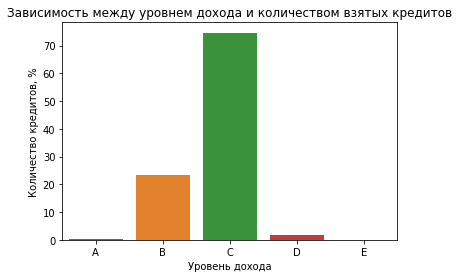

In [30]:
bar = sns.barplot(data=categorize_income_group, x=categorize_income_group.index, y='total_income_category_pct')
bar.set(xlabel='Уровень дохода', ylabel='Количество кредитов, %',\
        title='Зависимость между уровнем дохода и количеством взятых кредитов')
pass

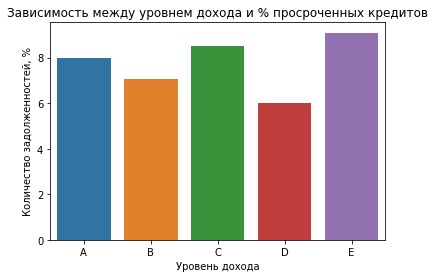

In [31]:
bar = sns.barplot(data=categorize_income_group, x=categorize_income_group.index, y='debt_pct')
bar.set(xlabel='Уровень дохода', ylabel='Количество задолженностей, %',\
        title='Зависимость между уровнем дохода и % просроченных кредитов')
pass

Люди с очень высоким и очень низким доходом почти не берут кредиты. Поэтому делать заключение, на основе имеющихся данных, по категориям 'A' и 'E' не представляется возможным. Подавляющее большинство кредитов берут заемщики с доходом категории 'С'.

**Вывод:** На основе имеющихся данных можно сказать, что в целом, чем выше доход, тем меньше кредитов не возвращенных в срок.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [32]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# функция get_relations_debt_from из пункта 2.7.1 возвращает % и абс.количество не вернувших кредит из данной категории
# % и абс.количество людей в данной категории

#purpose_category_group = get_relations_debt_from('purpose_category')
#purpose_category_group

 
purpose_category_group = data.pivot_table(index='purpose_category', values='debt', aggfunc=['mean', 'sum', 'count'])
purpose_category_group['mean'] = round(purpose_category_group['mean'] * 100, 2)
purpose_category_group.columns = ['debt_pct', 'debt_count', 'purpose_category_count']
purpose_category_group['purpose_category_pct'] = round(purpose_category_group['purpose_category_count'] / len(data) * 100, 2)
purpose_category_group

,debt_pct,debt_count,purpose_category_count,purpose_category_pct
purpose_category,,,,
операции с автомобилем,9.35,400,4279,20.06
операции с недвижимостью,7.26,780,10751,50.40
получение образования,9.25,369,3988,18.70
проведение свадьбы,7.91,183,2313,10.84


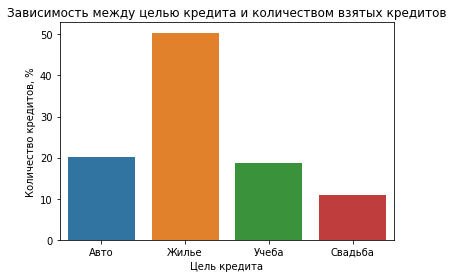

In [33]:
bar = sns.barplot(data=purpose_category_group, x=['Авто', 'Жилье', 'Учеба', 'Свадьба'], y='purpose_category_pct')
bar.set(xlabel='Цель кредита', ylabel='Количество кредитов, %',\
        title='Зависимость между целью кредита и количеством взятых кредитов')
pass

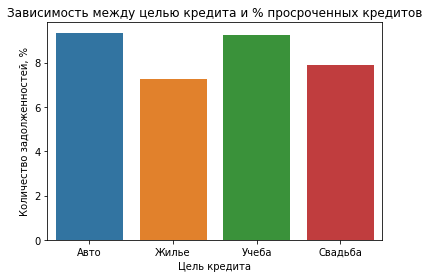

In [34]:
bar = sns.barplot(data=purpose_category_group, x=['Авто', 'Жилье', 'Учеба', 'Свадьба'], y='debt_pct')
bar.set(xlabel='Цель кредита', ylabel='Количество задолженностей, %',\
        title='Зависимость между целью кредита и % просроченных кредитов')
pass

Половина кредитов берется для операций с недвижимостью. На АВТО и УЧЕБУ берется ~ 20 %, на свадьбу 10 % кредитов. Хуже всего возвращаются кредиты на АВТО и УЧЕБУ, лучше всего возвращаются кредиты на ЖИЛЬЕ.

**Вывод:** Наиболее рискованные цели кредита - это на машину и на учебу. Наименее рискованная цель - операции с недвижимостью.

In [35]:
purpose_category_group = data.pivot_table(index='purpose_category', values='debt', aggfunc=['mean', 'sum', 'count'])
purpose_category_group['mean'] = round(purpose_category_group['mean'] * 100, 2)
purpose_category_group.columns = ['debt_pct', 'debt_count', 'purpose_category_count']
purpose_category_group['purpose_category_pct'] = round(purpose_category_group['purpose_category_count'] / \
                                                       purpose_category_group['purpose_category_count'].sum() * 100, 2)
purpose_category_group

,debt_pct,debt_count,purpose_category_count,purpose_category_pct
purpose_category,,,,
операции с автомобилем,9.35,400,4279,20.06
операции с недвижимостью,7.26,780,10751,50.40
получение образования,9.25,369,3988,18.70
проведение свадьбы,7.91,183,2313,10.84


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Все пропуски в исходных данных находятся в столбцах 'Стаж' и 'Уровень дохода', причем в одиноковых строках. Это количественные данные. Все остальные данные в строчках разные. То есть некоторые заемщики не указали свой стаж и уровень дохода. Возможно они отказались указывать эти данные или недавно уволились или это ошибка выгрузки данных из БД, например по какому-нибудь отделению банка.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* При наличии в данных сильных "выбросов" (одного или нескольких зачений, очень сильно отличаюшихся в большую или меньшую сторону от остальных значений) медианное значение является лучшим решением, потому что позволяет нивелировать влияние этих "выбросов" на среднее значение и при этом учесть их в анализе. Альтернативой является удаление этих выбросов из данных (если их немного, до 1 %), тогда можно использовать среднее значение, но при этом есть вероятность исказить результаты анализа.

### Шаг 4: общий вывод.

**Указанные категории влияют на возврат кредита в срок в пределах ~ 20-30 % в относительном выражении.
В абсолютном выражении это ~ 1.5-2 %. Насколько это много или мало должен решать заказчик анализа.**

    В целом больше всего кредитов берут заемщики без детей женатые/замужние с уровнем дохода 'С' 
    на операции с недвижимостью. Количество не возвращенных вовремя кредитов среднее.
    Самый лучший заемщик - вдовец/вдова без детей с уровнем дохода 'B', берущий кредит на недвижимость.
    Самый худший заемщик - не женат/не замужем с 2 и более детьми с уровнем дохода 'С' берущий кредит на автомобиль.

**Указанные категории влияют на возврат кредита в срок в пределах ~ 20-30 % в относительном выражении.
В абсолютном выражении это ~ 1.5-2 %. Насколько это много или мало должен решать заказчик анализа.**

    Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?
                
                Количество детей практически не влияет на возврат кредита в срок, сильнее влияет наличие или отсутствие
                детей. У бездетных заемщиков, кредитов не возвращенных вовремя на 21 % меньше, чем у заемщиков с детьми. 
                (в абсолютном выражении 7,54 % против 9,16 % в среднем).
        
    Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?
                
                Зависимость между семейным положением и возвратом кредита в срок есть. Наиболее рискованные категории
                "не женат/не замужем" и "гражданский брак". (в относительном выражении, не возвращенных кредитов в срок,
                у этих категорий на 35 % (в абсолютном 2,46 %) больше).    
    
    
    Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
    
                Судить о зависимости между уровнем дохода и возвратом кредита в срок для групп A, D, E не представляется
                возможным ввиду малого количества данных. Данные групп B и C показывают, что в целом, чем выше доход, 
                тем меньше кредитов не возвращенных в срок.(в относительном выражении у групп С на 20 % больше кредитов
                не возвращенных во время).    
    
    
    Задание 22. Как разные цели кредита влияют на его возврат в срок?
    
                Цели кредита влияют на его возврат в срок. Наиболее рискованные цели кредита - это на машину и на учебу.
                Наименее рискованная цель - операции с недвижимостью (в относительном выражении на 28 % (2 % в абсолютном)
                меньше кредитов, не возвращенных вовремя, чем среднее между "на машину" и "на учебу").
    
    
